In [1]:
# importing libraries
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from sklearn.preprocessing import MinMaxScaler # normalize data
from tensorflow.keras.models import Sequential # to build and train LSTM 
from tensorflow.keras.layers import LSTM, Dense # to build and train LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load the dataset
df = pd.read_csv('Electric_Production.csv')

# Convert DATE column to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Sort by date if not already sorted chronically
df = df.sort_values('DATE') 

# relevant column assuming 'IPG2211A2N' is the target
data = df['IPG2211A2N'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# create sequences for LSTM
# input sequence ='X'  and corresponding target value ='y'
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Choose sequence length (example = input sequence will contain 12 time steps)
sequence_length = 12

# Create sequences
X, y = create_sequences(scaled_data, sequence_length)

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1))) #= each input sequence has 12 time steps and 1 feature
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the model = 10% data is used for validation
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)

# Optionally, make predictions
pred = model.predict(X_test)

# Inverse transform predictions if needed
pred = scaler.inverse_transform(pred)


C:\Users\shifa\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.1935 - val_loss: 0.2821
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1200 - val_loss: 0.1509
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0552 - val_loss: 0.0319
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0153 - val_loss: 0.0229
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0147 - val_loss: 0.0274
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0134 - val_loss: 0.0265
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0125 - val_loss: 0.0197
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0120 - val_loss: 0.0203
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0118 - val_loss: 0.0209
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - val_loss: 0.0201
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0108 - val_loss: 0.0197
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106 - val_loss: 0.0197
E

In [2]:
# !pip install tensorflow

In [8]:
actualScore = scaler.inverse_transform(y_test.reshape(-1, 1))
for i in range(5):
    print(f"Actual Value: {actualScore[i]}, Predicted Value: {pred[i]}")

# MSE
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error is: {mse}")

Actual Value: [99.4712], Predicted Value: [100.51421]
Actual Value: [90.3566], Predicted Value: [97.26865]
Actual Value: [93.8095], Predicted Value: [104.35236]
Actual Value: [107.3312], Predicted Value: [116.59594]
Actual Value: [111.9646], Predicted Value: [113.81958]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 
Mean Squared Error is: 0.007265191525220871


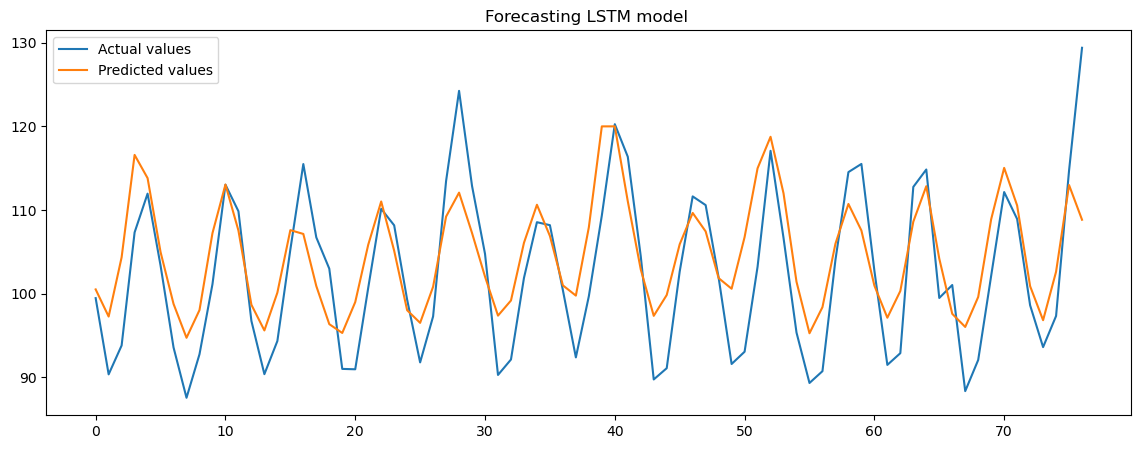

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.title("Forecasting LSTM model ")
plt.plot(actualScore, label='Actual values')
plt.plot(pred, label='Predicted values')
plt.legend()
plt.show()


Other model architecture 

Hybrid Model 


In [10]:
# LSTM with Convolutional Neural Network (CNN)
from tensorflow.keras.layers import Conv1D, MaxPooling1D, TimeDistributed, LSTM, Dense

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(TimeDistributed(Dense(50, activation='relu')))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f'Test MSE: {mse}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions if needed
predictions = scaler.inverse_transform(predictions)




C:\Users\shifa\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.1516 - val_loss: 0.1705
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0614 - val_loss: 0.0259
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0150 - val_loss: 0.0265
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0168 - val_loss: 0.0298
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0129 - val_loss: 0.0270
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0146 - val_loss: 0.0229
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0128 - val_loss: 0.0244
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0117 - val_loss: 0.0234
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0121 - val_loss: 0.0232
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0122 - val_loss: 0.0232
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0124 - val_loss: 0.0232
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0129 - val_loss: 0.0231


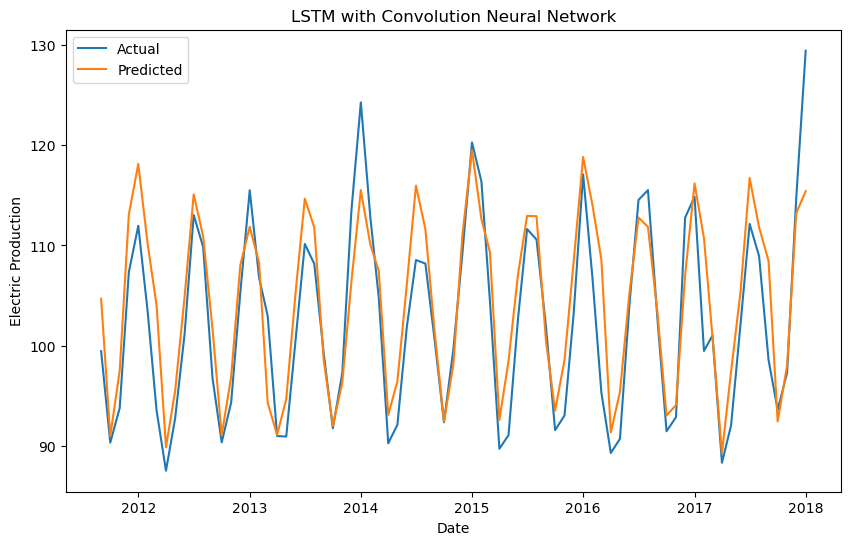

In [11]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('LSTM with Convolution Neural Network')
plt.plot(df['DATE'][len(df) - len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(df['DATE'][len(df) - len(predictions):], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Electric Production')
plt.legend()
plt.show()